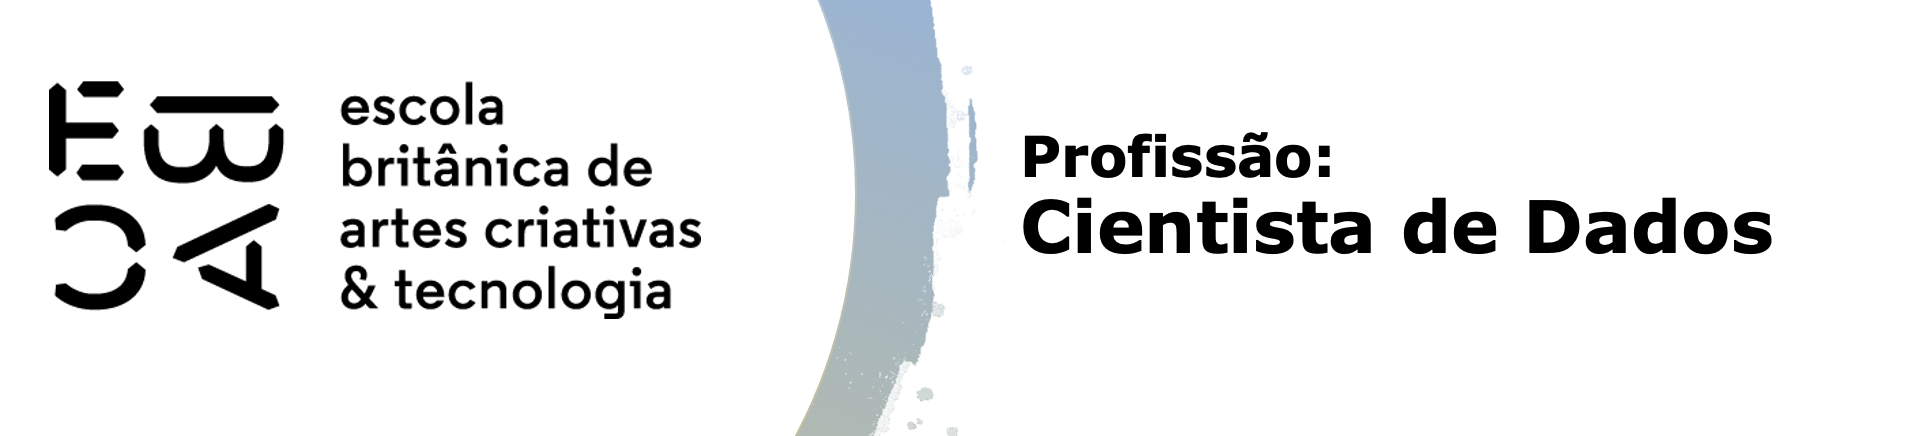

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [27]:
X_train = pd.read_fwf('X_train.txt', header = None)

In [29]:
X_train['indice'] = pd.read_fwf('subject_train.txt', header = None)

In [31]:
X_train['index'] = range(0, 7352)

In [32]:
X_train.set_index(['index', 'indice'], inplace=True)

In [34]:
y_train = pd.read_fwf('y_train.txt', header = None)

In [36]:
X_test = pd.read_fwf('X_test.txt', header = None)

In [37]:
X_test['indice'] = pd.read_fwf('subject_test.txt', header = None)

In [39]:
X_test['index'] = range(0, 2947)

In [40]:
X_test.set_index(['index', 'indice'], inplace=True)

In [41]:
y_test = pd.read_fwf('y_test.txt', header = None)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [42]:
arvore = DecisionTreeClassifier(min_samples_leaf=20).fit(X_train, y_train)

CPU times: total: 2.81 s
Wall time: 2.9 s


In [43]:
arvore.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.33959567e-03, 0.00000000e+00, 5.64172302e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.00009828e-03, 0.00000000e+00, 5.77877045e-04,
       0.00000000e+00, 4.10340026e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.12900852e-03, 0.00000000e+00,
       2.57543514e-01, 2.11133931e-03, 0.00000000e+00, 0.00000000e+00,
      

In [49]:
X_train = X_train[[9, 11, 37]].copy()
X_test = X_test[[9, 11, 37]].copy()

In [51]:
arvore = DecisionTreeClassifier(min_samples_leaf=20).fit(X_train, y_train)

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [91]:
%%time
caminho = arvore.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 15.6 ms
Wall time: 16.8 ms


In [92]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [93]:
ccp_alphas.shape

(190,)

In [94]:
grid_parametros = {'ccp_alpha':ccp_alphas}

In [95]:
grid = GridSearchCV(estimator = arvore, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 190 candidates, totalling 1900 fits
[CV 1/10; 1/190] START ccp_alpha=0.0............................................
[CV 1/10; 1/190] END .............ccp_alpha=0.0;, score=0.596 total time=   0.0s
[CV 2/10; 1/190] START ccp_alpha=0.0............................................
[CV 2/10; 1/190] END .............ccp_alpha=0.0;, score=0.571 total time=   0.0s
[CV 3/10; 1/190] START ccp_alpha=0.0............................................
[CV 3/10; 1/190] END .............ccp_alpha=0.0;, score=0.543 total time=   0.0s
[CV 4/10; 1/190] START ccp_alpha=0.0............................................
[CV 4/10; 1/190] END .............ccp_alpha=0.0;, score=0.600 total time=   0.0s
[CV 5/10; 1/190] START ccp_alpha=0.0............................................
[CV 5/10; 1/190] END .............ccp_alpha=0.0;, score=0.603 total time=   0.0s
[CV 6/10; 1/190] START ccp_alpha=0.0............................................
[CV 6/10; 1/190] END .............ccp_alpha=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(min_samples_leaf=20),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.26325229e-06, 8.05000999e-06, 9.28372800e-06,
       1.06486592e-05, 1.55613139e-05, 2.62319291e-05, 3.26330219e-05,
       3.29551230e-05, 3.33860916e-05, 3.77356790e-05, 3.88621172e-05,
       4.33862542e-05, 5.03785739e-05, 5.09470756e-05, 5.76975350e-05,
       6.3268...
       8.99806181e-04, 9.02413041e-04, 9.35160381e-04, 1.07291791e-03,
       1.22121905e-03, 1.30152891e-03, 1.47452619e-03, 1.54456488e-03,
       1.58704249e-03, 1.63917906e-03, 1.69262627e-03, 1.82069074e-03,
       1.86545784e-03, 1.97977450e-03, 2.54765023e-03, 2.78336697e-03,
       3.10679185e-03, 3.57201424e-03, 3.88716751e-03, 5.92046672e-03,
       8.69435626e-03, 1.21429210e-02, 1.69715456e-02, 4.45462669e-02,
       8.65376296e-02, 1.64666609e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [97]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018742,0.001778,0.001184,0.000576,0.0,{'ccp_alpha': 0.0},0.596467,0.570652,0.542857,0.6,0.602721,0.653061,0.527891,0.570068,0.668027,0.560544,0.589229,0.042523,152
1,0.015259,0.006356,0.002154,0.003822,0.000006,{'ccp_alpha': 6.263252289178702e-06},0.596467,0.565217,0.534694,0.6,0.602721,0.653061,0.527891,0.563265,0.668027,0.560544,0.587189,0.044048,180
2,0.016817,0.003585,0.000801,0.001780,0.000008,{'ccp_alpha': 8.050009993116041e-06},0.596467,0.570652,0.534694,0.6,0.602721,0.653061,0.527891,0.565986,0.668027,0.560544,0.588004,0.043662,170
3,0.018181,0.004158,0.001103,0.000702,0.000009,{'ccp_alpha': 9.283727999723885e-06},0.596467,0.570652,0.534694,0.6,0.602721,0.653061,0.527891,0.563265,0.668027,0.560544,0.587732,0.043807,173
4,0.016047,0.004023,0.000601,0.000491,0.000011,{'ccp_alpha': 1.0648659234999472e-05},0.596467,0.565217,0.534694,0.6,0.602721,0.653061,0.527891,0.567347,0.668027,0.560544,0.587597,0.043843,175


In [98]:
grid.best_index_

168

In [99]:
grid.best_score_

0.6207769520851819

In [100]:
grid.best_params_

{'ccp_alpha': 0.0012212190507943504}

In [101]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0012212190507943504, min_samples_leaf=20)

In [106]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]

clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=melhor_ccp).fit(X_train, y_train)


In [107]:
resultados.iloc[168]

mean_fit_time                                    0.021143
std_fit_time                                     0.003649
mean_score_time                                  0.001911
std_score_time                                   0.002919
param_ccp_alpha                                  0.001221
params               {'ccp_alpha': 0.0012212190507943504}
split0_test_score                                0.677989
split1_test_score                                0.611413
split2_test_score                                0.544218
split3_test_score                                0.659864
split4_test_score                                0.632653
split5_test_score                                0.655782
split6_test_score                                0.538776
split7_test_score                                     0.6
split8_test_score                                0.736054
split9_test_score                                 0.55102
mean_test_score                                  0.620777
std_test_score

In [109]:
acuracia_teste = clf.score(X_test, y_test)

Acurácia: 58.19


C:\Users\mario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


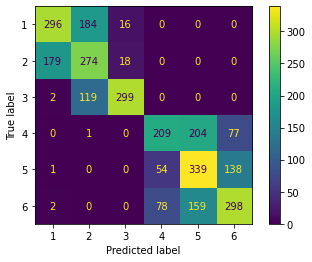

In [110]:
print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(clf, X_test, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [154]:
arvore_1 = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4).fit(X_train, y_train)

In [155]:
caminho = arvore_1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [156]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [157]:
ccp_alphas.shape

(15,)

In [158]:
grid_parametros = {'ccp_alpha':ccp_alphas}

In [159]:
grid = GridSearchCV(estimator = arvore_1, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10; 1/15] START ccp_alpha=0.0.............................................
[CV 1/10; 1/15] END ..............ccp_alpha=0.0;, score=0.655 total time=   0.0s
[CV 2/10; 1/15] START ccp_alpha=0.0.............................................
[CV 2/10; 1/15] END ..............ccp_alpha=0.0;, score=0.594 total time=   0.0s
[CV 3/10; 1/15] START ccp_alpha=0.0.............................................
[CV 3/10; 1/15] END ..............ccp_alpha=0.0;, score=0.565 total time=   0.0s
[CV 4/10; 1/15] START ccp_alpha=0.0.............................................
[CV 4/10; 1/15] END ..............ccp_alpha=0.0;, score=0.660 total time=   0.0s
[CV 5/10; 1/15] START ccp_alpha=0.0.............................................
[CV 5/10; 1/15] END ..............ccp_alpha=0.0;, score=0.618 total time=   0.0s
[CV 6/10; 1/15] START ccp_alpha=0.0.............................................
[CV 6/10; 1/15] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20),
             param_grid={'ccp_alpha': array([0.        , 0.00048377, 0.00096164, 0.00163918, 0.00186546,
       0.00278337, 0.00310679, 0.00357201, 0.00388717, 0.00869436,
       0.01214292, 0.01697155, 0.04454627, 0.08653763, 0.16466661])},
             verbose=100)

In [160]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011027,0.004105,0.002732,0.003895,0.0,{'ccp_alpha': 0.0},0.654891,0.593750,0.564626,0.659864,0.617687,0.646259,0.530612,0.572789,0.729252,0.530612,0.610034,0.060340,7
1,0.009716,0.002931,0.001104,0.000539,0.000484,{'ccp_alpha': 0.0004837741785838814},0.654891,0.593750,0.564626,0.659864,0.617687,0.646259,0.530612,0.572789,0.729252,0.530612,0.610034,0.060340,7
2,0.010670,0.001367,0.001204,0.000399,0.000962,{'ccp_alpha': 0.0009616383672666068},0.654891,0.593750,0.564626,0.659864,0.617687,0.646259,0.530612,0.572789,0.729252,0.530612,0.610034,0.060340,7
3,0.007801,0.007451,0.001891,0.004689,0.001639,{'ccp_alpha': 0.001639179063336691},0.654891,0.618207,0.564626,0.659864,0.617687,0.646259,0.530612,0.572789,0.729252,0.530612,0.612480,0.060125,5
4,0.010051,0.007236,0.001703,0.004457,0.001865,{'ccp_alpha': 0.0018654578376098366},0.654891,0.618207,0.564626,0.659864,0.617687,0.646259,0.530612,0.572789,0.729252,0.530612,0.612480,0.060125,5


In [165]:
grid.best_index_

7

In [166]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0035720142431889673, max_depth=4,
                       min_samples_leaf=20)

In [167]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]

clf = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4, ccp_alpha=melhor_ccp).fit(X_train, y_train)

In [168]:
resultados.iloc[7]

mean_fit_time                                    0.010315
std_fit_time                                     0.000782
mean_score_time                                  0.001299
std_score_time                                   0.000471
param_ccp_alpha                                  0.003572
params               {'ccp_alpha': 0.0035720142431889673}
split0_test_score                                0.654891
split1_test_score                                0.627717
split2_test_score                                0.564626
split3_test_score                                0.665306
split4_test_score                                 0.62449
split5_test_score                                0.673469
split6_test_score                                0.541497
split7_test_score                                0.564626
split8_test_score                                 0.72517
split9_test_score                                0.560544
mean_test_score                                  0.620234
std_test_score

In [169]:
acuracia_teste = clf.score(X_test, y_test)

Acurácia: 57.14


C:\Users\mario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


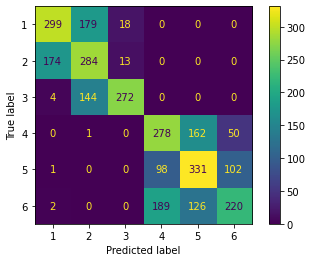

In [170]:
print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(clf, X_test, y_test);